<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/7thWeekTask/XGBoost_For_tugasxgboost2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

# Ganti 'your_file_path' dengan path sebenarnya ke file CSV Anda di Google Drive
file_path = '/content/drive/My Drive/Dataset/tugasxgboost2.csv'

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(file_path, delimiter=';')

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())
print(df.tail())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [5]:
# Memilih subset dari prediktor
predictors = ['fixed acidity', 'citric acid', 'chlorides', 'pH', 'alcohol']

# Menentukan target variabel
target = 'quality'

# Membuat DataFrame untuk prediktor
X = df[predictors]

# Membuat Series untuk target
y = df[target]

# Menampilkan beberapa baris pertama dari prediktor dan target
print("Predictors (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Predictors (X):
   fixed acidity  citric acid  chlorides    pH  alcohol
0            7.0         0.36      0.045  3.00      8.8
1            6.3         0.34      0.049  3.30      9.5
2            8.1         0.40      0.050  3.26     10.1
3            7.2         0.32      0.058  3.19      9.9
4            7.2         0.32      0.058  3.19      9.9

Target (y):
0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data validasi
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset hasil pemisahan
print("Ukuran data latih (X_train):", X_train.shape)
print("Ukuran data validasi (X_valid):", X_valid.shape)
print("Ukuran target latih (y_train):", y_train.shape)
print("Ukuran target validasi (y_valid):", y_valid.shape)

Ukuran data latih (X_train): (3918, 5)
Ukuran data validasi (X_valid): (980, 5)
Ukuran target latih (y_train): (3918,)
Ukuran target validasi (y_valid): (980,)


In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Membuat model XGBoost
model = XGBRegressor(random_state=42)

# Melatih model pada data latih
model.fit(X_train, y_train)

# Membuat prediksi pada data validasi
y_pred = model.predict(X_valid)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid, y_pred)

# Menampilkan MAE
print("Mean Absolute Error pada data validasi:", mae)


Mean Absolute Error pada data validasi: 0.5151482582092285


In [8]:
# Membuat model XGBoost dengan 500 estimators
model_500 = XGBRegressor(n_estimators=500, random_state=42)

# Melatih model pada data latih
model_500.fit(X_train, y_train)

# Membuat prediksi pada data validasi
y_pred_500 = model_500.predict(X_valid)

# Menghitung Mean Absolute Error (MAE)
mae_500 = mean_absolute_error(y_valid, y_pred_500)

# Menampilkan MAE
print("Mean Absolute Error pada data validasi dengan 500 estimators:", mae_500)


Mean Absolute Error pada data validasi dengan 500 estimators: 0.4719498661099648


In [9]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Inisialisasi XGBRegressor dengan learning rate kustom
model = xgb.XGBRegressor(
    learning_rate=0.05,  # Learning rate kustom
    n_estimators=90,     # Jumlah estimator
    early_stopping_rounds=10,  # Early stopping
    objective='reg:squarederror',  # Tujuan untuk regresi
    eval_metric='mae'  # Menggunakan mean absolute error sebagai metrik evaluasi
)

# Melatih model dengan data pelatihan dan set validasi untuk early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=False
)

# Membuat prediksi pada set validasi
y_pred = model.predict(X_valid)

# Menghitung dan mencetak Mean Absolute Error pada set validasi
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error pada Set Validasi: {mae}")


Mean Absolute Error pada Set Validasi: 0.5559443965250132


Mean Absolute Error pada Set Validasi: 0.5559443965250132


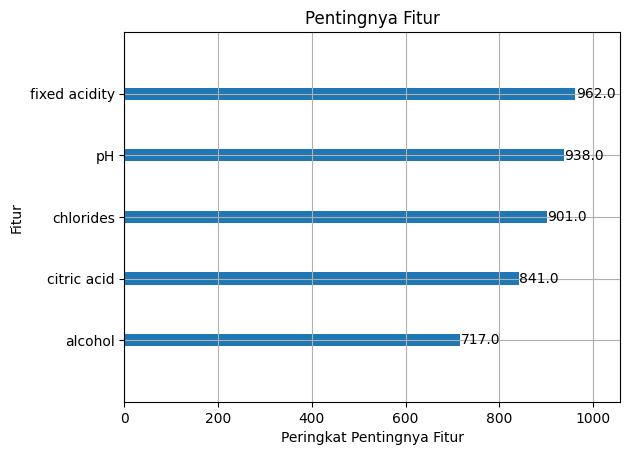

In [10]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Inisialisasi XGBRegressor dengan learning rate kustom
model = xgb.XGBRegressor(
    learning_rate=0.05,  # Learning rate kustom
    n_estimators=90,     # Jumlah estimator
    early_stopping_rounds=10,  # Early stopping
    objective='reg:squarederror',  # Tujuan untuk regresi
    eval_metric='mae'  # Menggunakan mean absolute error sebagai metrik evaluasi
)

# Melatih model dengan data pelatihan dan set validasi untuk early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=False
)

# Membuat prediksi pada set validasi
y_pred = model.predict(X_valid)

# Menghitung dan mencetak Mean Absolute Error pada set validasi
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error pada Set Validasi: {mae}")

# Visualisasi Feature Importance
# Menampilkan plot importansi fitur
xgb.plot_importance(model,
                    importance_type='weight',  # Bisa diganti dengan 'weight', 'gain', atau 'cover'
                    max_num_features=10,       # Maksimal 10 fitur yang akan ditampilkan
                    title='Pentingnya Fitur',  # Judul grafik
                    xlabel='Peringkat Pentingnya Fitur',  # Label sumbu X
                    ylabel='Fitur')  # Label sumbu Y
plt.show()


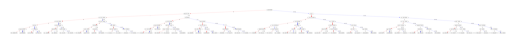

In [11]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Visualisasi Struktur Pohon (Tree)
# Menampilkan pohon pertama dari model
xgb.plot_tree(model, num_trees=0)  # num_trees=0 untuk pohon pertama (0-based index)
plt.show()

{'validation_0': OrderedDict([('mae', [0.6642900972950215, 0.6541646509754414, 0.644300372746526, 0.6372770825210883, 0.6322600471730135, 0.6292211303905565, 0.6259521941749417, 0.6233704318805616, 0.6207583339846864, 0.6183623056022488, 0.6161717181303064, 0.6137471096856254, 0.6117112145131948, 0.6099539781103329, 0.6083739163924237, 0.6066345268366288, 0.6050988070818842, 0.6037447510933389, 0.6021152389292814, 0.6012886991306227, 0.6002730247925739, 0.5986001107157494, 0.5966604344698847, 0.5954966856508839, 0.5942662073641407, 0.5925105785836979, 0.5914811051621729, 0.5903069029048997, 0.589081554023587, 0.5874928790695814, 0.5868929055272316, 0.5859974875742076, 0.5853963029627898, 0.5845007701795928, 0.583788208572232, 0.5829663072313581, 0.5828947402993027, 0.5816938006148047, 0.5811986971874626, 0.5798142462360616, 0.5792201348713466, 0.577931928148075, 0.5776675350812017, 0.577332549679036, 0.5767525093896049, 0.5763974121638706, 0.5756915116796688, 0.5758595018970724, 0.5748

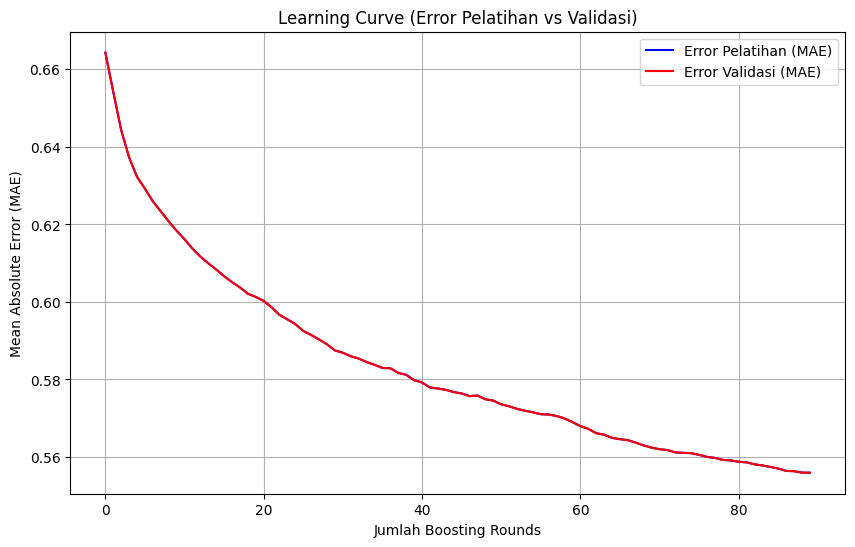

In [12]:
import matplotlib.pyplot as plt

# Mengakses hasil evaluasi
evals_result = model.evals_result()

# Menampilkan hasil evaluasi untuk memeriksa struktur
print(evals_result)  # Ini akan membantu Anda mengetahui struktur dictionary

# Misalnya, jika hanya ada 'validation_0', Anda dapat menggunakan:
train_error = evals_result['validation_0']['mae']  # MAE untuk pelatihan
valid_error = evals_result['validation_0']['mae']  # MAE untuk validasi (gunakan yang sama jika hanya satu set evaluasi)

# Membuat plot Learning Curve (Error pelatihan vs Validasi)
plt.figure(figsize=(10, 6))
plt.plot(train_error, label='Error Pelatihan (MAE)', color='blue')
plt.plot(valid_error, label='Error Validasi (MAE)', color='red')
plt.xlabel('Jumlah Boosting Rounds')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Learning Curve (Error Pelatihan vs Validasi)')
plt.legend()
plt.grid(True)
plt.show()


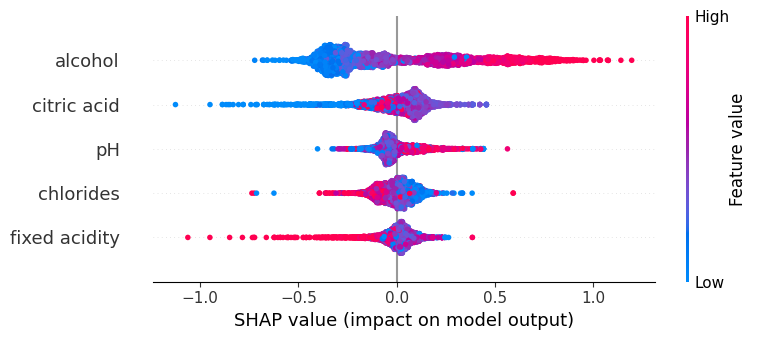

In [13]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Jika model XGBoost sudah dilatih, lanjutkan di bawah ini
# Pastikan untuk mengganti 'model' dengan model yang sudah dilatih

# Menghitung SHAP values untuk data pelatihan
explainer = shap.Explainer(model)  # Membuat objek explainer untuk model XGBoost
shap_values = explainer(X_train)  # Menghitung SHAP values untuk data pelatihan

# Visualisasi SHAP summary plot
shap.summary_plot(shap_values, X_train)


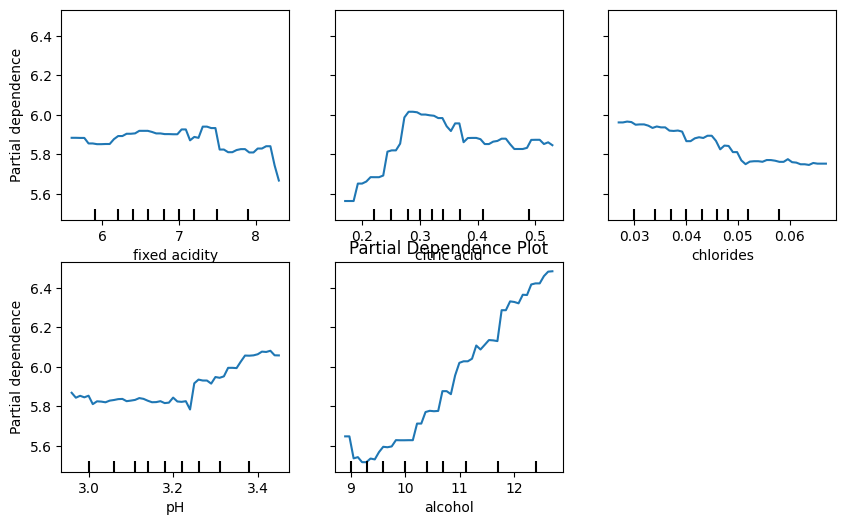

In [15]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Misalkan model Anda adalah model yang sudah dilatih
# X_train adalah data fitur pelatihan Anda

# Membuat Partial Dependence Plot untuk fitur tertentu (misalnya, 'Rooms', 'Distance', dll)
features = ['fixed acidity', 'citric acid', 'chlorides', 'pH', 'alcohol']  # List of features

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))  # Ukuran plot

# Membuat Partial Dependence Plot untuk fitur yang dipilih
PartialDependenceDisplay.from_estimator(model, X_train, features=features, ax=ax, grid_resolution=50)

# Menampilkan plot
plt.title("Partial Dependence Plot")
plt.show()
